In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
import seaborn as sns

In [2]:
# Data Analysis
df=pd.read_csv("C:\Santhosh\Minor project\Random_Forest\Dataset.csv")

print(df.isnull().sum())
print(df.tail())
df.info()
df.head()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64
      PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
7104  P03834  Karapakkam       598  03-01-2011             51        1.0   
7105  P10000   Velachery      1897  08-04-2004             52        3.0   
7106  P09594   Velachery      1614  25-08-2006            152        2.0   
7107  P06508  Karapakkam       787  03-08-2009             40        1.0   
7108  P09794   Velachery      1896  13-07-2005            156        3.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  ... UTILITY_AVAIL  \
7104         1.0   

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
# Converting the categorical values to numerical values
df = df.drop('PRT_ID', axis=1)
label_encoder = LabelEncoder()
df['NEW_AREA'] = label_encoder.fit_transform(df['AREA'])
df['NEW_SALE_COND'] = label_encoder.fit_transform(df['SALE_COND'])
df['NEW_PARK_FACIL'] = label_encoder.fit_transform(df['PARK_FACIL'])
df['NEW_UTILITY_AVAIL'] = label_encoder.fit_transform(df['UTILITY_AVAIL'])
# Convert categorical values to numerical for 'STREET' column
df['NEW_STREET'] = label_encoder.fit_transform(df['STREET'])

# Convert categorical values to numerical for 'MZZONE' column
df['NEW_MZZONE'] = label_encoder.fit_transform(df['MZZONE'])
# Convert categorical values to numerical for 'MZZONE' column
df['BUILDTYPE'] = label_encoder.fit_transform(df['BUILDTYPE'])

# Converting date format to year format
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'], infer_datetime_format=True)
df['NEW_DATE_BUILD'] = df['DATE_BUILD'].dt.year
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'], infer_datetime_format=True)
df['NEW_DATE_SALE'] = df['DATE_SALE'].dt.year
columns_to_drop = ['AREA', 'SALE_COND', 'PARK_FACIL','UTILITY_AVAIL','DATE_BUILD','STREET','MZZONE','DATE_SALE']
df.drop(columns=columns_to_drop, inplace=True)

C:\Users\91918\AppData\Local\Temp\ipykernel_16116\4265859204.py:19: UserWarning: Parsing '19-12-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'], infer_datetime_format=True)
C:\Users\91918\AppData\Local\Temp\ipykernel_16116\4265859204.py:19: UserWarning: Parsing '13-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'], infer_datetime_format=True)
C:\Users\91918\AppData\Local\Temp\ipykernel_16116\4265859204.py:19: UserWarning: Parsing '13-03-2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'], infer_datetime_format=True)
C:\Users\91918\AppData\Local\Temp\ipykernel_16116\4265859204.py:19: UserWarning: Parsing '22-06-2006' in DD/MM/YYYY format. Provide format or specify infer_d

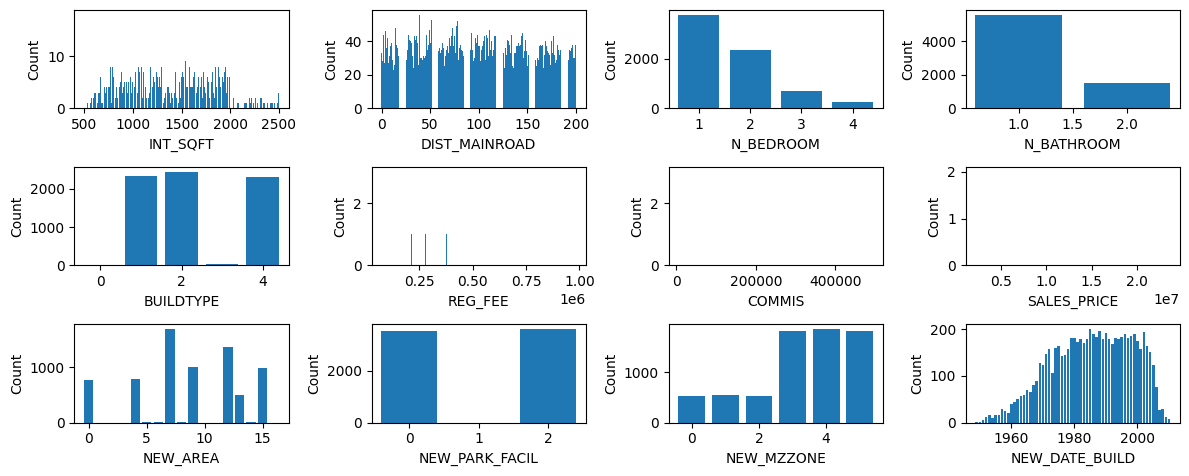

In [4]:
# Selecting the attributes for the bar plot
attributes = ['INT_SQFT',	'DIST_MAINROAD'	,'N_BEDROOM'	,'N_BATHROOM'	,'BUILDTYPE',	'REG_FEE',	'COMMIS'	,'SALES_PRICE',	'NEW_AREA',	'NEW_PARK_FACIL',	'NEW_MZZONE',	'NEW_DATE_BUILD']

# Subset the dataframe with the selected attributes
barplot_data = df[attributes]

# Calculate the number of attributes
num_attributes = len(attributes)

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Plotting the bar plot for each attribute
for i, attribute in enumerate(attributes):
    plt.subplot(4, 4, i+1)
    plt.bar(barplot_data[attribute].value_counts().index, barplot_data[attribute].value_counts())
    plt.xlabel(attribute)
    plt.ylabel('Count')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
df.head()
# Dropping all th NAN Values
print(df.shape)
nan_counts = df.isnull().sum()
df.dropna(inplace=True)
print(df.shape)

(7109, 21)
(7056, 21)


Top 5 most important features:
REG_FEE
NEW_AREA
INT_SQFT
BUILDTYPE
NEW_MZZONE
N_BEDROOM
N_BATHROOM
COMMIS
NEW_DATE_BUILD


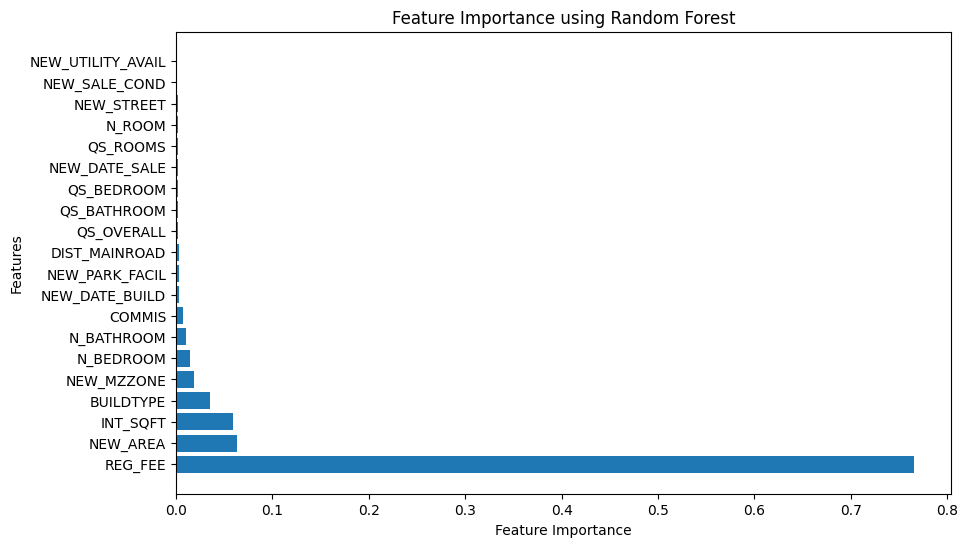

In [6]:
# Applying the randomforest algorithm and finding the accuracy rate,RMSE,MSE,MAEand R Squred Values
X=df.drop(['SALES_PRICE'], axis= 1)
y=df['SALES_PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)



# Feature importance
importance = rf_regressor.feature_importances_
feature_names = X.columns

# Sort feature importance in descending order
sorted_indices = np.argsort(importance)[::-1]

# Select the top 5 most important features
top_features = feature_names[sorted_indices][:9]
print("Top 5 most important features:")
for feature in top_features:
    print(feature)


sorted_indices = np.argsort(importance)[::-1]

# Select the top features
top_features = feature_names[sorted_indices]
top_importances = importance[sorted_indices]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), top_importances, align='center')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance using Random Forest')
plt.show()


Selected Features are:
REG_FEE: 21.682112310630707
COMMIS: 3.9237824312817167
Lasso Regression Results:
RMSE: 1371844.9533746433
MSE: 1881958576099.4773
MAE: 1089168.51115176
R-squared: 0.8731107264984731


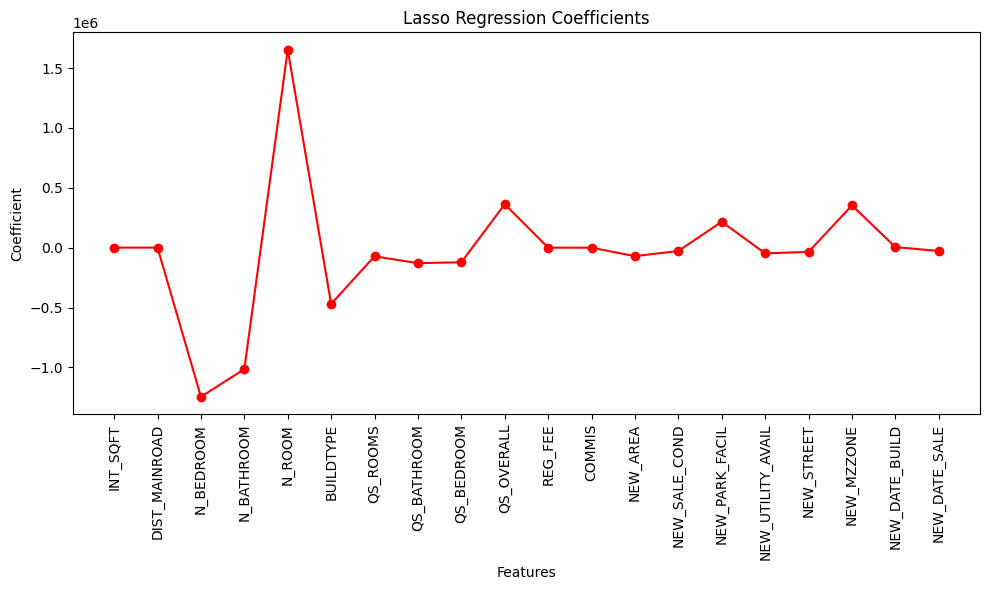

In [7]:
#Apllying Lasso Regression algorithm and finding the accuracy rate, RMSE,MSE,MAE and R Squared Values
lasso_regression=Lasso()
lasso_regression.fit(X_train, y_train)
y_pred=lasso_regression.predict(X_test)

#Feature Selection
lasso=LassoCV(cv=5)
lasso.fit(X,y)

#Get the selected features and their corresponding coefficients
selected_features= X.columns[lasso.coef_ !=0]
selected_coefs= lasso.coef_[lasso.coef_ !=0]

# Print the selected features and their coefficients
print('Selected Features are:')
for feature,coef in zip(selected_features, selected_coefs):
    print(f"{feature}: {coef}")
print('Lasso Regression Results:')

# Calculate RMSE
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

# Calculate MSE
mse=mean_squared_error(y_test,y_pred)
print("MSE:",mse)

#Calculate MAE
mae=mean_absolute_error(y_test,y_pred)
print("MAE:",mae)

# Calculate R-squared
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

#Apply Lasso regression
lasso_regression=Lasso(alpha=0.1) # Set the desired value for alpha
lasso_regression.fit(X,y)

#Plot the Lasso coefficient
plt.figure(figsize=(10,6))
plt.plot(range(len(X.columns)),lasso_regression.coef_,marker='o',linestyle='-',color='r')
plt.xticks(range(len(X.columns)),X.columns,rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Lasso Regression Coefficients')
plt.tight_layout()
plt.show()

In [8]:
# Drop irrelevant columns
columns_to_drop = ['QS_ROOMS', 'QS_BEDROOM', 'N_ROOM', 'NEW_STREET', 'NEW_DATE_SALE', 'NEW_UTILITY_AVAIL', 'NEW_SALE_COND','QS_OVERALL','QS_BATHROOM']
df.drop(columns=columns_to_drop, inplace=True)

# Encode categorical features using one-hot encoding
df_encoded = pd.get_dummies(df)

# Split the data into features (X) and target (y)
X = df_encoded.drop(['SALES_PRICE'], axis=1)
y = df_encoded['SALES_PRICE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Perform prediction on the test set
y_pred = rf_regressor.predict(X_test)
print('Random Forest Algorithm Results Results:')
# Calculate Accuracy score
print("Random Forest Regression Model Score is ", round(rf_regressor.score(X_test, y_test) * 100))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

print('Training score:', rf_regressor.score(X_train, y_train))
print('Testing score:', rf_regressor.score(X_test, y_test))




Random Forest Algorithm Results Results:
Random Forest Regression Model Score is  97
RMSE: 641530.0856956088
MSE: 411560850852.6152
MAE: 496797.4055240793
R-squared: 0.9722508996586978
Training score: 0.9961491725430255
Testing score: 0.9722508996586978


In [9]:
# Create a dictionary with the input values
input_values = {
    'INT_SQFT': 1986,
    'DIST_MAINROAD': 26,
    'N_BEDROOM': 2.0,
    'N_BATHROOM': 1.0,
    'BUILDTYPE_Commercial': 1,
    'REG_FEE': 760122,
    'COMMIS': 304049,
    'NEW_AREA_Anna Nagar': 1,
    'NEW_PARK_FACIL_No': 1,
    'NEW_MZZONE_RH': 1,
    'NEW_DATE_BUILD_1995': 1
}
# Create a DataFrame from the input values
input_df = pd.DataFrame(input_values, index=[0])

# Perform one-hot encoding on the input data
input_df_encoded = pd.get_dummies(input_df)

# Reorder input DataFrame columns to match the training data columns
input_df_encoded = input_df_encoded.reindex(columns=X.columns, fill_value=0)

# Predict the house prices using the trained Random Forest regressor
predicted_prices = rf_regressor.predict(input_df_encoded)

# Print the predicted prices

print("Predicted House Prices:")
for price in predicted_prices:
    print(price)

Predicted House Prices:
21111783.9


,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,BUILDTYPE,REG_FEE,COMMIS,SALES_PRICE,NEW_AREA,NEW_PARK_FACIL,NEW_MZZONE,NEW_DATE_BUILD
0,1004,131,1.0,1.0,1,380000,144400,7600000,12,2,0,1967
1,1986,26,2.0,1.0,1,760122,304049,21717770,4,0,3,1995
2,909,70,1.0,1.0,1,421094,92114,13159200,0,2,4,1992
3,1855,14,3.0,2.0,4,356321,77042,9630290,15,0,2,1988
4,1226,84,1.0,1.0,4,237000,74063,7406250,12,2,1,1979
